In [1]:
#For data frame related and matrix related operations
import pandas as pd
import numpy as np

In [2]:
#For plotting and charting
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
#Machine Learning Algorithms and Evaluation Metrics Library
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
import string

In [7]:
#Import the Libraries related to ML Algorithms
from sklearn.linear_model import LogisticRegression

In [8]:
#Import Classification Metrics
from sklearn.metrics import confusion_matrix, roc_auc_score

In [9]:
from collections import Counter

In [10]:
baby = pd.read_csv('/home/shrikrishna/Desktop/Coursera Machine Learning/A Case Study Approach/Week 3/amazon_baby.csv')

In [11]:
baby.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Perform Text Cleaning

In [12]:
#Removing Punctuation strips punctuation from line of text
def remove_punctuation(text):
    #print(type(text))
    exclude = set(string.punctuation)
    #print(("".join(ch for ch in text if(ch not in exclude))))
    return ("".join(ch for ch in text if(ch not in exclude)))
    

In [13]:
#Fill NA
baby.review = baby.fillna({'review': ''})['review']

In [14]:
#Remove Punctuation from the reviews
baby['review_clean'] = list(map(remove_punctuation, baby['review'].tolist()))

## Extract Sentiments

### 3. We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment¶

In [15]:
baby = baby.loc[baby['review']!=3, :]

### 4. Label the ratings as positive class(+1) and negative class(-1)

In [16]:
baby['sentiment'] = list(map(lambda x:-1 if(x<3) else 1,
                            baby['rating'].tolist()))

In [17]:
#Check whether any review is having rating>3 and sentiment = -1 is present
baby.loc[(baby['sentiment']==-1) & (baby['rating']>3), :]

,name,review,rating,review_clean,sentiment


In [18]:
baby.loc[(baby['sentiment']==-1) & (baby['rating']<3), :].shape

(26493, 5)

## Read the Training and Test Files

In [19]:
os.getcwd()

'/home/shrikrishna/Desktop/Coursera Machine Learning/Machine Learning: Classification/Week 6 - Precision & Recall'

In [20]:
base_path = '/home/shrikrishna/Desktop/Coursera Machine Learning/Machine Learning: Classification/Week 1'
train_path = base_path + '/train-idx.json/train-idx.json'
test_path = base_path + '/test-idx.json/test-idx.json'

In [21]:
train_data_index, test_data_index = [pd.read_json(path) for path in 
                                    [train_path, test_path]]
train_data = baby.iloc[train_data_index[0], :]
test_data = baby.iloc[test_data_index[0], :]

In [22]:
train_data.head()

,name,review,rating,review_clean,sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...,1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,1


In [23]:
test_data.head()

,name,review,rating,review_clean,sentiment
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,A friend of mine pinned this product on Pinter...,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1
14,Nature\'s Lullabies First Year Sticker Calendar,"Space for monthly photos, info and a lot of us...",5,Space for monthly photos info and a lot of use...,1
18,Nature\'s Lullabies Second Year Sticker Calendar,I completed a calendar for my son\'s first yea...,4,I completed a calendar for my sons first year ...,1
24,Nature\'s Lullabies Second Year Sticker Calendar,Wife loves this calender. Comes with a lot of ...,5,Wife loves this calender Comes with a lot of s...,1


## Build the word count vector for each review


In [24]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words

# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(train_data['review_clean'])

# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test_data['review_clean'])

## 7. Learn a logistic regression classifier using the training data.

In [25]:
model = LR()

#Fit the model on training data with sentiment as the target
model.fit(train_matrix, train_data['sentiment'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Model Evaluation

In [26]:
accuracy_model_test = accuracy_score(test_data['sentiment'], 
                                     model.predict(test_matrix))
print("Accuracy Test Data:- %.3f" %(accuracy_model_test))

Accuracy Test Data:- 0.913


In [27]:
prediction_test, prediction_train = [model.predict(data) for data in
                                    [test_matrix, train_matrix]]

## Baseline: Majority class prediction
Typically, a good model should beat the majority class classifier. Since the majority class in this dataset is the positive class (i.e., there are more positive reviews than negative reviews), the accuracy of the majority class classifier is simply the fraction of positive reviews in the test set:

In [86]:
dict(Counter(train_data['sentiment']))

{1: 113858, -1: 19558}

In [28]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print ("Baseline accuracy (majority class classifier): %s" % baseline)

Baseline accuracy (majority class classifier): 0.8561915046796257


### Quiz question: Using accuracy as the evaluation metric, was our logistic regression model better than the baseline (majority class classifier)?

In [29]:
ans = "Yes"
print(ans)

Yes


In [30]:
actual_vs_predicted_test = pd.DataFrame({'Actual':test_data['sentiment'],
                                        'Predicted': prediction_test},
                                        columns = ['Actual', 'Predicted'])
actual_vs_predicted_test.head()

,Actual,Predicted
8,1,1
9,1,1
14,1,1
18,1,1
24,1,1


## Confusion Matrix

In [31]:
#Confusion Matrix for test data

CM = confusion_matrix(test_data['sentiment'], prediction_test)
CM


array([[ 2934,  1860],
       [ 1031, 27511]])

In [32]:
model.classes_

array([-1,  1])

In [33]:
print("Actual Label\tPredicted Label\t Count")
print("--------------------------------------------")

for i in range(len(model.classes_)):
    for j in range(len(model.classes_)):
        print('{0:^13} | {1:^15} | {2:5d}'.format(
            model.classes_[i], model.classes_[j], CM[i,j]))
        
        

Actual Label	Predicted Label	 Count
--------------------------------------------
     -1       |       -1        |  2934
     -1       |        1        |  1860
      1       |       -1        |  1031
      1       |        1        | 27511


In [34]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

In [35]:
y_true = ["cat", "ant", "cat"]
y_pred = ["ant", "cat", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "cat"])

array([[0, 1],
       [1, 1]])

### Quiz Question: How many predicted values in the test set are false positives?

In [87]:
tn, fp, fn, tp = confusion_matrix(test_data['sentiment'], prediction_test).ravel()
print("TN_test:- {}\nFP_test:- {}\nFN_test:- {}\nTP_test:- {}" .format(
tn, fp, fn, tp))

TN_test:- 2934
FP_test:- 1860
FN_test:- 1031
TP_test:- 27511


## Computing the cost of mistakes
Put yourself in the shoes of a manufacturer that sells a baby product on Amazon.com and you want to monitor your product's reviews in order to respond to complaints. Even a few negative reviews may generate a lot of bad publicity about the product. So you don't want to miss any reviews with negative sentiments --- you'd rather put up with false alarms about potentially negative reviews instead of missing negative reviews entirely. In other words, false positives cost more than false negatives. (It may be the other way around for other scenarios, but let's stick with the manufacturer's scenario for now.)


Suppose you know the costs involved in each kind of mistake:

    $100 for each false positive.
    $1 for each false negative.
    Correctly classified reviews incur no cost.

### Quiz Question: Given the stipulation, what is the cost associated with the logistic regression classifier's performance on the test set?

In [37]:
penalty_fp, penalty_fn = 100, 1
cost_logistic_test = (fp*penalty_fp + fn*penalty_fn)
print("Cost Incurred:- {}" .format(cost_logistic_test))

Cost Incurred:- 187031


In [38]:
#Calculate Precision and Recall on test set
print("Precision:- %f\n Recall:- %f" %(round(tp/(fp+tp), 2), round(tp/(tp+fn), 2)))

Precision:- 0.940000
 Recall:- 0.960000


### Out of all reviews in the test set that are predicted to be positive, what fraction of them are false positives? (Round to the second decimal place e.g. 0.25) 

In [39]:
print(1-round(tp/(fp+tp), 2))

0.06000000000000005


In [40]:
print(round(fp/(fp+tp), 2))

0.06


### Quiz Question: Based on what we learned in lecture, if we wanted to reduce this fraction of false positives to be below 3.5%, we would: (see quiz)

In [41]:
#[1-round(tp/(fp+tp)] < 0.035

#fp/(fp+tp) < 0.035


### Quiz Question: What fraction of the positive reviews in the test_set were correctly predicted as positive by the classifier?

In [42]:
#Recall
print(str(tp/(tp + fn))+ '%')

0.9638777941279518%


### Quiz Question: What is the recall value for a classifier that predicts +1 for all data points in the test_data?

In [43]:
#Out of the positive majority class all are predicted as positive. 
#Negative reviews are also predicted as positive.There exist FP.
#Not even a single positive is predicted as negative, 0 FN.
print("%d" %(1))

1


## Precision-recall tradeoff

In [44]:
'''
probabilities: an SArray of probability values
threshold: a float between 0 and 1
'''
def apply_threshold(probabilities, threshold):
    predicted_class = []
    predicted_class = list(map(lambda x:1 if(x>=threshold) else -1, probabilities))
    return (predicted_class)
        

### 15. Using the model you trained, compute the class probability values P(y=+1|x,w) for the data points in the test_data. Then use thresholds set at 0.5 (default) and 0.9 to make predictions from these probability values.



In [45]:
help(model.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



In [46]:
#The returned estimates for all classes are ordered by the
#label of classes.
probabilities = model.predict_proba(test_matrix)

In [47]:
len(probabilities) == test_matrix.shape[0]

True

In [48]:
#The returned estimates for all classes are ordered by the
#label of classes.
probabilities

array([[0.03398046, 0.96601954],
       [0.01235237, 0.98764763],
       [0.01338018, 0.98661982],
       ...,
       [0.37759725, 0.62240275],
       [0.00402227, 0.99597773],
       [0.0710766 , 0.9289234 ]])

### Quiz Question: What happens to the number of positive predicted reviews as the threshold increased from 0.5 to 0.9?

In [49]:
def get_precision_recall(threshold, probabilities=probabilities, data=test_data):
    #Probabilities of positive class(order [-1, 1])
    pos_probabilities = [ele[1] for ele in probabilities]
    predicted_class = apply_threshold(pos_probabilities, threshold)
    tn, fp, fn, tp = confusion_matrix(data['sentiment'], 
                                  predicted_class).ravel()
    precision, recall = (tp/(tp+fp), tp/(tp+fn))
    return (precision, recall)

In [50]:
#Get the predicted class based on the probabilities
#Probabilities of positive class
precision_th_1, recall_th_1 = get_precision_recall(0.5, probabilities)
precision_th_2, recall_th_2 = get_precision_recall(0.9, probabilities)


In [51]:
#positive predicted reviews threshold = 0.5
print("Precision:- %.2f\nRecall:- %.2f" %(precision_th_1, recall_th_1))

Precision:- 0.94
Recall:- 0.96


In [52]:
#positive predicted reviews threshold = 0.9
print("Precision:- %.2f\nRecall:- %.2f" %(precision_th_2, recall_th_2))

Precision:- 0.98
Recall:- 0.84


In [53]:
#Quiz Question (variant 1):
#Does the precision increase with a higher threshold?
pos_probabilities = [ele[1] for ele in probabilities]
predicted_class_th_1 = apply_threshold(pos_probabilities, 0.5)
predicted_class_th_2 = apply_threshold(pos_probabilities, 0.9)

tn, fp, fn, tp = confusion_matrix(test_data['sentiment'], 
                                  predicted_class_th_1).ravel()

print("TP:- %d\nFP:- %d\nFN:- %d\nTN:- %d" %(tp, fp, fn, tn))
print("Precision:- %.2f\nRecall:- %.2f" %(tp/(tp+fp), tp/(tp+fn)))        

TP:- 27511
FP:- 1860
FN:- 1031
TN:- 2934
Precision:- 0.94
Recall:- 0.96


In [54]:
#Quiz Question (variant 2): 
#Does the recall increase with a higher threshold?
tn, fp, fn, tp = confusion_matrix(test_data['sentiment'], 
                                  predicted_class_th_2).ravel()
print("TP:- %d\nFP:- %d\nFN:- %d\nTN:- %d" %(tp, fp, fn, tn))
print("Precision:- %.2f\nRecall:- %.2f" %(tp/(tp+fp), tp/(tp+fn)))        

TP:- 23874
FP:- 581
FN:- 4668
TN:- 4213
Precision:- 0.98
Recall:- 0.84


In [55]:
if((23874+581) > (27511+1860)):
    print("Larger")
else:
    print("Smaller or Equal")

Smaller or Equal


## Precision-recall curve

In [56]:
threshold_values = np.linspace(0.5, 1, num=100)
print (threshold_values)

[0.5        0.50505051 0.51010101 0.51515152 0.52020202 0.52525253
 0.53030303 0.53535354 0.54040404 0.54545455 0.55050505 0.55555556
 0.56060606 0.56565657 0.57070707 0.57575758 0.58080808 0.58585859
 0.59090909 0.5959596  0.6010101  0.60606061 0.61111111 0.61616162
 0.62121212 0.62626263 0.63131313 0.63636364 0.64141414 0.64646465
 0.65151515 0.65656566 0.66161616 0.66666667 0.67171717 0.67676768
 0.68181818 0.68686869 0.69191919 0.6969697  0.7020202  0.70707071
 0.71212121 0.71717172 0.72222222 0.72727273 0.73232323 0.73737374
 0.74242424 0.74747475 0.75252525 0.75757576 0.76262626 0.76767677
 0.77272727 0.77777778 0.78282828 0.78787879 0.79292929 0.7979798
 0.8030303  0.80808081 0.81313131 0.81818182 0.82323232 0.82828283
 0.83333333 0.83838384 0.84343434 0.84848485 0.85353535 0.85858586
 0.86363636 0.86868687 0.87373737 0.87878788 0.88383838 0.88888889
 0.89393939 0.8989899  0.9040404  0.90909091 0.91414141 0.91919192
 0.92424242 0.92929293 0.93434343 0.93939394 0.94444444 0.94949

In [57]:
precision_all, recall_all = [], []
#Probabilities are already predicted using model.predict_proba()

for thresh in threshold_values:
    precision_all.append(get_precision_recall(thresh)[0])
    recall_all.append(get_precision_recall(thresh)[1])


In [58]:
precision_all_test = [get_precision_recall(thresh)[0]
                      for thresh in threshold_values]
precision_all_test

[0.9366722277076027,
 0.937184730743013,
 0.9374744167007777,
 0.937997200314111,
 0.9384121125123893,
 0.9389626385657589,
 0.9395828338527931,
 0.9400912177223003,
 0.9406069761054655,
 0.9412068076328004,
 0.9416015692212395,
 0.9420559459831886,
 0.9425683832913663,
 0.9429883628578335,
 0.9435436473638721,
 0.9440443213296399,
 0.944587003259588,
 0.9451175061616968,
 0.9454425409180943,
 0.9459130434782609,
 0.946611409068747,
 0.9470729751403368,
 0.9477525931617364,
 0.9479938487347966,
 0.9483428411437371,
 0.9488347643245137,
 0.9492018944044904,
 0.9495680269719744,
 0.9499314370099504,
 0.9502270407265303,
 0.9507965599887213,
 0.9516766678432756,
 0.9519652198501343,
 0.95236747115861,
 0.9527335860822733,
 0.9532053783659133,
 0.9536296770067157,
 0.9539972248905967,
 0.9543333452071385,
 0.9551279762967194,
 0.9554752878907088,
 0.9559113212277497,
 0.9562674894166607,
 0.9566920644048303,
 0.9574812788018433,
 0.9581529581529582,
 0.958648111332008,
 0.958908077187647,


In [59]:
(set(precision_all).difference(set(precision_all_test)) == set()) and \
(set(precision_all_test).difference(set(precision_all)) == set())

True

In [60]:
recall_all

[0.9638777941279518,
 0.9633872889075749,
 0.9628967836871978,
 0.9625464228155,
 0.9619858454207834,
 0.9615303762875762,
 0.9611449793287086,
 0.9604792936724826,
 0.9599187162777661,
 0.9591128862728611,
 0.9586574171396538,
 0.9580968397449373,
 0.9573961180015416,
 0.9567654684324854,
 0.956204891037769,
 0.9552238805970149,
 0.9543830145049401,
 0.9538925092845632,
 0.9532268236283372,
 0.9528063905822998,
 0.9523158853619228,
 0.9516852357928667,
 0.9507742975264523,
 0.950318828393245,
 0.9493728540396609,
 0.9486020601219256,
 0.9479714105528695,
 0.9473057248966436,
 0.9465699670660781,
 0.9457991731483428,
 0.9451334874921169,
 0.9446079461845701,
 0.9436269357438162,
 0.9428911779132506,
 0.9420853479083456,
 0.9413495900777801,
 0.9402985074626866,
 0.9394576413706117,
 0.9386518113657066,
 0.9374255483147642,
 0.9360591409151426,
 0.9351131665615584,
 0.933886903510616,
 0.9326256043725036,
 0.9317847382804288,
 0.9305584752294864,
 0.9291920678298647,
 0.9279658047789223

In [61]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    plt.show()

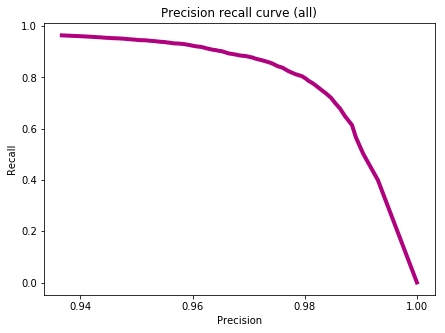

In [62]:
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

### Quiz Question: Among all the threshold values tried, what is the smallest threshold value that achieves a precision of 96.5% or better? Round your answer to 3 decimal places.


In [63]:
base_precision = 0.965
precision_df = pd.DataFrame({'Precision':precision_all, 
                             'Threshold':threshold_values},
                              columns = ['Precision', 'Threshold'])
#Select the rows having precision >= 96.5%
precision_df.loc[precision_df['Precision']>= base_precision, :].sort_values(
                                                by = 'Threshold', 
                                                ascending = True).head()


,Precision,Threshold
62,0.965211,0.813131
63,0.965552,0.818182
64,0.966456,0.823232
65,0.967239,0.828283
66,0.967822,0.833333


In [85]:
min(precision_df.loc[precision_df['Precision']>= base_precision, 'Threshold'])

0.8131313131313131

In [88]:
precision_df.loc[precision_df['Precision']>= 0.965, :].tail()

,Precision,Threshold
95,0.988431,0.979798
96,0.989110,0.984848
97,0.990405,0.989899
98,0.993036,0.994949
99,1.000000,1.000000


In [65]:
print(round(0.813131, 3))

0.813


### Quiz Question: Using threshold = 0.98, how many false negatives do we get on the test_data? This is the number of false negatives (i.e the number of reviews to look at when not needed) that we have to deal with using this classifier.

In [66]:
#Probabilities of positive class(order [-1, 1])
pos_probabilities = [ele[1] for ele in probabilities]
predicted_class = apply_threshold(pos_probabilities, threshold=0.98)
tn, fp, fn, tp = confusion_matrix(test_data['sentiment'], 
                                  predicted_class).ravel()
print("TP:- %d\nFP:- %d\nFN:- %d\nTN:- %d" %(tp, fp, fn, tn))
precision, recall = (tp/(tp+fp), tp/(tp+fn))

TP:- 17478
FP:- 205
FN:- 11064
TN:- 4589


In [89]:
confusion_matrix(test_data['sentiment'], 
                                  predicted_class)

array([[ 4589,   205],
       [11064, 17478]])

### Evaluating specific search terms

So far, we looked at the number of false positives for the entire test set. In this section, let's select reviews using a specific search term and optimize the precision on these reviews only. After all, a manufacturer would be interested in tuning the false positive rate just for their products (the reviews they want to read) rather than that of the entire set of products on Amazon.


In [67]:
test_data.columns

Index(['name', 'review', 'rating', 'review_clean', 'sentiment'], dtype='object')

In [68]:
test_data['name']

8         Baby Tracker&reg; - Daily Childcare Journal, S...
9         Baby Tracker&reg; - Daily Childcare Journal, S...
14          Nature\'s Lullabies First Year Sticker Calendar
18         Nature\'s Lullabies Second Year Sticker Calendar
24         Nature\'s Lullabies Second Year Sticker Calendar
31                              Lamaze Peekaboo, I Love You
32                              Lamaze Peekaboo, I Love You
36                              Lamaze Peekaboo, I Love You
38             SoftPlay Twinkle Twinkle Elmo A Bedtime Book
50                                SoftPlay Cloth Book, Love
53        SoftPlay Baby Animals of the World Soft Cloth ...
64                                Our Baby Girl Memory Book
82        Cloth Diaper Pins Stainless Steel Traditional ...
102       Newborn Baby Tracker&reg; - Round the Clock Ch...
105       Newborn Baby Tracker&reg; - Round the Clock Ch...
106       Newborn Baby Tracker&reg; - Round the Clock Ch...
109       Newborn Baby Tracker&reg; - Ro

In [69]:
temp_lower_reviews = list(map(lambda x: x.lower(), test_data['review_clean']))
temp_baby = test_data
temp_baby['review_clean'] = temp_lower_reviews

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
baby_reviews = test_data.loc[test_data['name'].apply(lambda x: 'baby' in str(x) or 'Baby' in str(x))]


In [71]:
#'baby' in x.lower()
baby_reviews_tlower = test_data[test_data['name'].apply(
                            lambda x: 'baby' in str(x))]
baby_reviews_tCamel = test_data[test_data['name'].apply(
                            lambda x: 'Baby' in str(x))]

In [72]:
baby_reviews_tlower.shape[0] + baby_reviews_tCamel.shape[0] == baby_reviews.shape[0]

False

In [73]:
print(baby_reviews_tlower.shape)

(554, 5)


In [74]:
print(baby_reviews_tCamel.shape)

(5643, 5)


In [75]:
6197

6197

In [76]:
baby_reviews.shape

(6123, 5)

In [77]:
baby_reviews.head()

,name,review,rating,review_clean,sentiment
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,a friend of mine pinned this product on pinter...,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,this has been an easy way for my nanny to reco...,1
53,SoftPlay Baby Animals of the World Soft Cloth ...,not bad but not as interesting to my 1-year ol...,3,not bad but not as interesting to my 1year old...,1
64,Our Baby Girl Memory Book,Really happy with this purchase. I was looking...,5,really happy with this purchase i was looking ...,1
102,Newborn Baby Tracker&reg; - Round the Clock Ch...,Love it love it love it!! Got my first baby t...,5,love it love it love it got my first baby tra...,1


### 21. Now, let's predict the probability of classifying these reviews as positive. Make sure to convert the column review_clean of baby_reviews into a 2D array before computing class probability values. In scikit-learn, this task would be implemented as follows

In [78]:
baby_matrix = vectorizer.transform(baby_reviews['review_clean'])
baby_pos_probabilities = model.predict_proba(baby_matrix)

### 22. Let's plot the precision-recall curve for the baby_reviews dataset. We again use 100 equally spaced values between 0.5 and 1 for the threshold.

In [79]:
threshold_values = np.linspace(0.5, 1, num=100)

In [80]:
precision_baby_all, recall_baby_all = [], []
#Probabilities are already predicted using model.predict_proba()

for thresh in threshold_values:
    precision_baby_all.append(get_precision_recall(thresh, baby_pos_probabilities, baby_reviews)[0])
    recall_baby_all.append(get_precision_recall(thresh, baby_pos_probabilities, baby_reviews)[1])


In [81]:
#Quiz Question: Among all the threshold values tried, 
#what is the smallest threshold value that achieves a 
#precision of 96.5% or better for the reviews of data
#in baby_reviews? Round your answer to 3 decimal places.

base_precision = 0.965
precision_baby_df = pd.DataFrame({'Precision':precision_baby_all, 
                             'Threshold':threshold_values},
                              columns = ['Precision', 'Threshold'])
#Select the rows having precision >= 96.5%
precision_baby_df.loc[precision_baby_df['Precision']>= 0.965, :].sort_values(
                                                by = 'Threshold', 
                                                ascending = True).head()

,Precision,Threshold
64,0.965928,0.823232
65,0.966450,0.828283
66,0.966540,0.833333
67,0.967196,0.838384
68,0.968531,0.843434


In [82]:
print(round(0.823232, 3))

0.823


In [83]:
#Quiz Question: Is this threshold value smaller or 
#larger than the threshold used for the entire 
#dataset to achieve the same specified precision of 96.5%?
print("Larger")

Larger


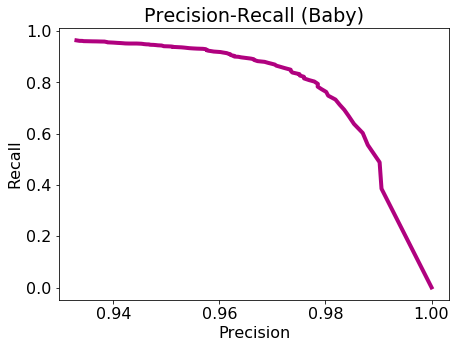

In [84]:
plot_pr_curve(precision_baby_all, recall_baby_all, "Precision-Recall (Baby)")